# Scraping & Crawling

___

## Scraping

합법인가 불법인가
- 합법이다: 사적 이익을 추구하지 않는 경우.
- 불법이다: 무단 크롤링 후 사적 이익을 위해 공개적으로 서비스하는 경우.
- 주의사항
    1. 스크랩하는 컨텐츠에 지적재산권이 있는지
    2. 크롤링 행위가 사이트에 부담을 주지 않는지
    3. 크롤러가 사이트 정책을 위반하지 않는지
    4. 크롤러가 민감한 정보(사용자 개인 정보)를 가져오지 않는지
    5. 가져온 컨텐츠를 적합한 사용 표준 하에서 사용하는지
- opt-in: 미리 허가를 구하고 사용
- opt-out: 일단 사용하고 문제가 될시 사용 중지

robot.txt
- 웹사이트에 접근하는 bot들을 규제하기 위한 규약.
- 권고안이기 때문에 반드시 지켜야 하는 것은 아님.

In [2]:
import builtwith

print(builtwith.parse('http://google.com'))
print(builtwith.parse('http://www.naver.com'))

{'web-servers': ['Google Web Server']}
{}


웹서버의 정보를 확인할 수 있다.(확인 불가한 사이트도 존재)

In [5]:
import whois

print(whois.whois('http://www.naver.com'))

{
  "domain_name": [
    "NAVER.COM",
    "naver.com"
  ],
  "registrar": "Gabia, Inc.",
  "whois_server": "whois.gabia.com",
  "referral_url": null,
  "updated_date": [
    "2016-08-05 06:37:57",
    "2018-02-28 11:27:15"
  ],
  "creation_date": [
    "1997-09-12 04:00:00",
    "1997-09-12 00:00:00"
  ],
  "expiration_date": [
    "2023-09-11 04:00:00",
    "2023-09-11 00:00:00"
  ],
  "name_servers": [
    "NS1.NAVER.COM",
    "NS2.NAVER.COM",
    "ns1.naver.com",
    "ns2.naver.com"
  ],
  "status": [
    "clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited",
    "clientTransferProhibited https://icann.org/epp#clientTransferProhibited",
    "clientUpdateProhibited https://icann.org/epp#clientUpdateProhibited",
    "ok https://icann.org/epp#ok"
  ],
  "emails": [
    "white.4818@navercorp.com",
    "dl_ssl@navercorp.com",
    "abuse@gabia.com"
  ],
  "dnssec": "unsigned",
  "name": "NAVER Corp.",
  "org": "NAVER Corp.",
  "address": "6 Buljung-ro, Bundang-gu, Seongnam

웹사이트 소유자 정보를 가져올 수 있다.

In [6]:
import urllib
from urllib.request import urlopen

urllib.request: opening & reading url

In [11]:
req = urlopen('http://python.org')
print(req)
print(req.read())

b'<!doctype html>\n<!--[if lt IE 7]>   <html class="no-js ie6 lt-ie7 lt-ie8 lt-ie9">   <![endif]-->\n<!--[if IE 7]>      <html class="no-js ie7 lt-ie8 lt-ie9">          <![endif]-->\n<!--[if IE 8]>      <html class="no-js ie8 lt-ie9">                 <![endif]-->\n<!--[if gt IE 8]><!--><html class="no-js" lang="en" dir="ltr">  <!--<![endif]-->\n\n<head>\n    <meta charset="utf-8">\n    <meta http-equiv="X-UA-Compatible" content="IE=edge">\n\n    <link rel="prefetch" href="//ajax.googleapis.com/ajax/libs/jquery/1.8.2/jquery.min.js">\n\n    <meta name="application-name" content="Python.org">\n    <meta name="msapplication-tooltip" content="The official home of the Python Programming Language">\n    <meta name="apple-mobile-web-app-title" content="Python.org">\n    <meta name="apple-mobile-web-app-capable" content="yes">\n    <meta name="apple-mobile-web-app-status-bar-style" content="black">\n\n    <meta name="viewport" content="width=device-width, initial-scale=1.0">\n    <meta name="Ha

urlopen을 통해 url에 request message를 전달하면 url에서 response 객체(byte 형태)를 전달받는다.

In [15]:
req = urlopen('http://python.org')
text = req.read().decode("utf-8")
print(text)

<!doctype html>
<!--[if lt IE 7]>   <html class="no-js ie6 lt-ie7 lt-ie8 lt-ie9">   <![endif]-->
<!--[if IE 7]>      <html class="no-js ie7 lt-ie8 lt-ie9">          <![endif]-->
<!--[if IE 8]>      <html class="no-js ie8 lt-ie9">                 <![endif]-->
<!--[if gt IE 8]><!--><html class="no-js" lang="en" dir="ltr">  <!--<![endif]-->

<head>
    <meta charset="utf-8">
    <meta http-equiv="X-UA-Compatible" content="IE=edge">

    <link rel="prefetch" href="//ajax.googleapis.com/ajax/libs/jquery/1.8.2/jquery.min.js">

    <meta name="application-name" content="Python.org">
    <meta name="msapplication-tooltip" content="The official home of the Python Programming Language">
    <meta name="apple-mobile-web-app-title" content="Python.org">
    <meta name="apple-mobile-web-app-capable" content="yes">
    <meta name="apple-mobile-web-app-status-bar-style" content="black">

    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <meta name="HandheldFriendly" conte

urlopen을 통해 전달받은 response 객체의 내용을 utf-8로 디코딩.

In [16]:
resp = urlopen('http://google.com')
print(resp.read().decode('utf-8'))

<!doctype html><html itemscope="" itemtype="http://schema.org/WebPage" lang="ko"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>Google</title><script nonce="bgY+XOQs4AqQzwvH12Juwg==">(function(){window.google={kEI:'wPRSW5bZNMXp-QaQrq3YCg',kEXPI:'0,1353746,58,1369,284,305,1017,281,264,231,215,1634,5,195,411,53,21,93,21,135,578,2339146,271,156,32,329294,1294,12383,2349,2506,32692,15247,867,317,1251,7,7356,3232,14329,2192,369,548,664,326,1776,113,2201,3191,1077,1359,63,73,130,5107,444,131,1119,2,578,728,311,2120,254,1108,1712,1376,505,277,453,377,1240,479,609,454,231,8,1569,222,552,1231,1018,282,2,2825,2161,22,604,2,154,505,1367,273,122,2,70,3,741,196,394,29,272,328,569,509,1587,214,82,1344,38,567,263,8,43,21,1,16,160,3,44,289,123,7,421,480,209,129,105,386,8,918,2,164,7,28,446,18,619,29,440,267,188,3,4,4,4,101,133,93,158,451,7,63,215,353,63,955,230,67,7,1251,1008,

In [17]:
resp = urlopen("https://www.google.co.kr/search?q=%E3%85%8E%E3%85%87&oq=%E3%85%8E%E3%85%87&aqs=chrome..69i57j69i60l2.912j0j7&sourceid=chrome&ie=UTF-8")

HTTPError: HTTP Error 403: Forbidden

403 에러 발생: search 이하에 대한 접근을 차단했기 때문에 forbidden error 발생.

In [18]:
from urllib.error import HTTPError

try:
    urlopen('https://www.google.co.kr/search?q=%E3%85%8E%E3%85%87&oq=%E3%85%8E%E3%85%87&aqs=chrome..69i57j69i60l2.912j0j7&sourceid=chrome&ie=UTF-8')
except HTTPError as e:
    print(e.code, e.reason, e.headers)

403 Forbidden Content-Type: text/html; charset=UTF-8
Date: Sat, 21 Jul 2018 08:57:23 GMT
Server: gws
Cache-Control: private
X-XSS-Protection: 1; mode=block
X-Frame-Options: SAMEORIGIN
Alt-Svc: quic=":443"; ma=2592000; v="44,43,39,35"
Accept-Ranges: none
Vary: Accept-Encoding
Connection: close




에러 header message를 가져옴.

원인: agent 정보가 없으므로 에러 발생.

400번대 에러
- request message header의 정보가 잘못되어 발생.
- 주로 사용자의 과실로 인해 발생.

500번대 에러
- 주로 서버의 과실로 인해 발생.

In [20]:
from urllib.request import Request
from urllib.error import HTTPError

def download(url, agent='python bot', num_retries=2):
    headers = {"User-agent": agent}
    req = Request(url, headers=headers)
    
    try:
        resp = urlopen(req)
    except HTTPError as e:
        resp = None
        print(e.code, e.reason, e.headers)
        if 500<=e.code<600 and num_retries > 0:
            return download(url, num_retries = num_retries - 1)
        
    return resp

download 함수 정의
- 기본 agent를 python bot으로 설정.
- 기본 재시도 횟수를 2로 설정.
- req 객체를 urlopen의 argument로 사용.

api와 url을 통한 접근의 차이
- api는 인증된 키가 있으면 별도의 agent 정보 없이 사용 가능.

In [29]:
html_google = download("https://www.google.co.kr/search?q=%E3%85%8E%E3%85%87&oq=%E3%85%8E%E3%85%87&aqs=chrome..69i57j69i60l2.912j0j7&sourceid=chrome&ie=UTF-8")

In [33]:
html_google.read().decode('utf-8')

''

In [25]:
html_naver = download("https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=1&ie=utf8&query=%E3%85%8E%E3%85%87")

403 Forbidden Date: Sat, 21 Jul 2018 09:06:54 GMT
Content-Type: text/html; charset=UTF-8
Transfer-Encoding: chunked
Connection: close
Vary: Accept-Encoding
Set-Cookie: page_uid=T173rlpySDosssgjjkCssssstpN-509435; path=/; domain=.naver.com
Set-Cookie: _naver_usersession_=9BVZYljItU3LRlVZY/Z1SA==; path=/; expires=Sat, 21-Jul-18 09:11:54 GMT; domain=.naver.com
X-Frame-Options: SAMEORIGIN
X-XSS-Protection: 1; report=/p/er/post/xss
Cache-Control: no-cache, no-store, must-revalidate, max-age=0
Pragma: no-cache
Vary: Accept-Encoding




여전히 에러: 현재 agent인 python bot에 대한 접근을 허용하지 않았기 때문.

In [36]:
agent = "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_13_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/67.0.3396.99 Safari/537.36"

정상 접근시의 response message header로부터 정상 접근 가능한 agent 정보를 가져왔다.

In [37]:
html_naver = download("https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=1&ie=utf8&query=%E3%85%8E%E3%85%87", agent=agent)
html_naver.read().decode('utf-8')

'<!doctype html> <html lang="ko"> <head> <meta charset="utf-8"> <meta name="referrer" content="always">  <meta name="format-detection" content="telephone=no,address=no,email=no"> <meta name="viewport" content="width=device-width,initial-scale=1.0,maximum-scale=2.0"> <meta property="og:title" content="ㅎㅇ : 네이버 통합검색"/> <meta property="og:image" content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png"> <meta property="og:description" content="\'ㅎㅇ\'의 네이버 통합검색 결과입니다."> <meta name="description" lang="ko" content="\'ㅎㅇ\'의 네이버 통합검색 결과입니다."> <title>ㅎㅇ : 네이버 통합검색</title> <link rel="shortcut icon" href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_140327.ico">  <link rel="search" type="application/opensearchdescription+xml" href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" title="Naver" /><link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/sstatic/search/pc/css/search1_180712.css"> <link rel="stylesheet" type="text/css" href="https

'<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="ko"><head><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><link href="/images/branding/product/ico/googleg_lodp.ico" rel="shortcut icon"><meta content="origin" name="referrer"><title>ㅎㅇ - Google 검색</title><script nonce="+3JQX9KmwCODvpYIIVwoBA==">(function(){window.google={kEI:\'B_lSW4jTJdrM-QaVyaiQDw\',kEXPI:\'31\',authuser:0,kscs:\'c9c918f0_B_lSW4jTJdrM-QaVyaiQDw\',kGL:\'KR\'};google.kHL=\'ko\';})();google.time=function(){return(new Date).getTime()};google.timers={};google.startTick=function(c,b){var a=b&&google.timers[b].t?google.timers[b].t.start:google.time();google.timers[c]={t:{start:a},e:{},m:{}};(a=window.performance)&&a.now&&(google.timers[c].wsrt=Math.floor(a.now()))};google.startTick("webaft");google.startTick("load");</script><!--srt--><script nonce="+3JQX9KmwCODvpYIIVwoBA==">(function(){google.lc=[];google.li=0;google.getEI=function(a){for(v
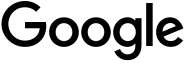
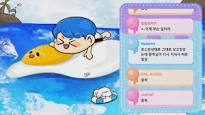

In [35]:
html_google = download("https://www.google.co.kr/search?q=%E3%85%8E%E3%85%87&oq=%E3%85%8E%E3%85%87&aqs=chrome..69i57j69i60l2.912j0j7&sourceid=chrome&ie=UTF-8", agent=agent)
html_google.read().decode('utf-8')

해결: agent 정보를 임의로 수정하여 정상적인 접근으로 가장하였다.

In [40]:
import requests

agent = "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_13_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/67.0.3396.99 Safari/537.36"

def download_requests(url, agent='python bot', num_retries=2):
    headers = {"User-agent": agent}
    resp = requests.request("get", url, headers=headers)

    if 500<=resp.status_code<600 and num_retries > 0:
        print(resp.status_code, resp.reason, resp.headers)
        return download(url, num_retries = num_retries - 1)
        
    return resp

In [41]:
html_naver = download_requests("https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=1&ie=utf8&query=%E3%85%8E%E3%85%87", agent=agent)
type(html_naver)

requests.models.Response

urllib.request 대신 requests를 사용하면 더욱 편리하게 결과를 받아올 수 있다.(권장)
- request 메소드: get, post 방식.
- urllib.request와의 차이점
    * urllib: 기본적으로 제공되는 모듈.
    * requests: 별도로 설치해야 하는 모듈.
    * urllib을 가장 사람이 사용하기 쉽게 만든 것이 requests이다.

In [44]:
print(html_naver.encoding)
print(html_naver.text)

UTF-8
<!doctype html> <html lang="ko"> <head> <meta charset="utf-8"> <meta name="referrer" content="always">  <meta name="format-detection" content="telephone=no,address=no,email=no"> <meta name="viewport" content="width=device-width,initial-scale=1.0,maximum-scale=2.0"> <meta property="og:title" content="ㅎㅇ : 네이버 통합검색"/> <meta property="og:image" content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png"> <meta property="og:description" content="'ㅎㅇ'의 네이버 통합검색 결과입니다."> <meta name="description" lang="ko" content="'ㅎㅇ'의 네이버 통합검색 결과입니다."> <title>ㅎㅇ : 네이버 통합검색</title> <link rel="shortcut icon" href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_140327.ico">  <link rel="search" type="application/opensearchdescription+xml" href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" title="Naver" /><link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/sstatic/search/pc/css/search1_180712.css"> <link rel="stylesheet" type="text/css" href="http

Response.encoding: encoding 작업을 자동으로 수행 - utf-8로 자동 encoding.

=> 문자 깨지는 경우 발생할 수 있음.

In [45]:
from urllib import parse

parse.quote("ㅎㅇ")

'%E3%85%8E%E3%85%87'

parse.quote
- utf-8 type encoding을 hexa byte type으로 바꿔준다.
- url 일부를 바꾸고자 할 때 사용.
    * 예: url = "https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=1&ie=utf8&query="+parse.quote("ㅎㅇ")
- 다른 내용을 검색하고자 하면 parse.quote 함수의 argument만 바꿔주면 된다.

In [46]:
url = "https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=1&ie=utf8&query="+parse.quote("한양대")

html = download_requests(url, agent=agent)
html.text

'<!doctype html> <html lang="ko"> <head> <meta charset="utf-8"> <meta name="referrer" content="always">  <meta name="format-detection" content="telephone=no,address=no,email=no"> <meta name="viewport" content="width=device-width,initial-scale=1.0,maximum-scale=2.0"> <meta property="og:title" content="한양대 : 네이버 통합검색"/> <meta property="og:image" content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png"> <meta property="og:description" content="\'한양대\'의 네이버 통합검색 결과입니다."> <meta name="description" lang="ko" content="\'한양대\'의 네이버 통합검색 결과입니다."> <title>한양대 : 네이버 통합검색</title> <link rel="shortcut icon" href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_140327.ico">  <link rel="search" type="application/opensearchdescription+xml" href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" title="Naver" /><link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/sstatic/search/pc/css/search1_180712.css"> <link rel="stylesheet" type="text/css" href="h

parse.quote를 활용함으로써 requests와 urllib을 혼합하여 사용하였다.

In [50]:
import json

params = {
    "where":"nexearch",
    "sm":"top_hty",
    "fbm":1,
    "ie":"utf8",
    "query":parse.quote("한양대")
}

jsonParams = json.dumps(params)

In [53]:
import requests

def download_json(url, agent="python bot", num_retries=2):
    headers = {"User-agent":agent}
    resp = requests.request("post", url, headers=headers, json=jsonParams)
    
    if 500<=resp.status_code<600 and num_retries>0:
        print(resp.status_code, resp.reason, resp.headers)
        return download(url, num_retries=num_retries-1)
    
    return resp

In [54]:
html = download_json("http://httpbin.org/post")
html.text

'{"args":{},"data":"\\"{\\\\\\"where\\\\\\": \\\\\\"nexearch\\\\\\", \\\\\\"sm\\\\\\": \\\\\\"top_hty\\\\\\", \\\\\\"fbm\\\\\\": 1, \\\\\\"ie\\\\\\": \\\\\\"utf8\\\\\\", \\\\\\"query\\\\\\": \\\\\\"%ED%95%9C%EC%96%91%EB%8C%80\\\\\\"}\\"","files":{},"form":{},"headers":{"Accept":"*/*","Accept-Encoding":"gzip, deflate","Connection":"close","Content-Length":"122","Content-Type":"application/json","Host":"httpbin.org","User-Agent":"python bot"},"json":"{\\"where\\": \\"nexearch\\", \\"sm\\": \\"top_hty\\", \\"fbm\\": 1, \\"ie\\": \\"utf8\\", \\"query\\": \\"%ED%95%9C%EC%96%91%EB%8C%80\\"}","origin":"220.88.36.134","url":"http://httpbin.org/post"}\n'

post 방식으로 request를 전송하였고 정상적으로 response message를 받아왔다.

In [55]:
import requests

def download_get(url, agent="python bot", num_retries=2):
    headers = {"User-agent":agent}
    resp = requests.get(url, headers=headers, params=params)
    
    if 500<=resp.status_code<600 and num_retries>0:
        print(resp.status_code, resp.reason, resp.headers)
        return download(url, num_retries=num_retries-1)
    
    return resp

requests.get
- requests.request("get", ...)과 같은 기능.
- 차이점: params에 dict를 그대로 넣어줘도 제대로 동작한다.(별도의 json을 이용한 파싱작업 필요없음)

In [56]:
html = download_get("http://search.naver.com/search.naver", agent=agent)
html.text

'<!doctype html> <html lang="ko"> <head> <meta charset="utf-8"> <meta name="referrer" content="always">  <meta name="format-detection" content="telephone=no,address=no,email=no"> <meta name="viewport" content="width=device-width,initial-scale=1.0,maximum-scale=2.0"> <meta property="og:title" content="%ED%95%9C%EC%96%91%EB%8C%80 : 네이버 통합검색"/> <meta property="og:image" content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png"> <meta property="og:description" content="\'%ED%95%9C%EC%96%91%EB%8C%80\'의 네이버 통합검색 결과입니다."> <meta name="description" lang="ko" content="\'%ED%95%9C%EC%96%91%EB%8C%80\'의 네이버 통합검색 결과입니다."> <title>%ED%95%9C%EC%96%91%EB%8C%80 : 네이버 통합검색</title> <link rel="shortcut icon" href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_140327.ico">  <link rel="search" type="application/opensearchdescription+xml" href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" title="Naver" /><link rel="stylesheet" type="text/css" href="https://ssl.pstat

get 방식
- 파라미터들을 url에 전부 포함시켜 보낸다.
- 길이 제한 있음
- 한글 깨짐 현상 있음
- 보안 취약

post 방식
- 데이터는 데이터대로 보내고 url은 url대로 따로 보낸다.
- 보안성 높음

___

## Crawling

Crawler
- 웹사이트를 돌아다니며 정보를 수집하는 소프트웨어.
- 주로 검색엔진에서 사용한다.
- 인덱싱을 하기 위해 필요.
- 링크를 전부 따라가며 수집.

BeautifulSoup
- 사용자 정의로 crawler를 만들 수 있게 해줌.
- html, xml을 파싱하기 위한 라이브러리.(가져오는 것과 처리하는 것은 사용자가 별도로 해줘야 함)
- lxml에 비해 속도가 느리지만 lxml이 동작하지 않는 사이트가 있기에 사용.

In [57]:
from bs4 import BeautifulSoup

In [58]:
html = """
    <html>
        <head></head>
        <body>
            <div id="wrap">
                <p class="content">
                    <a href="#">link</a>
                </p>
            </div>
        </body>
    </html>
"""

In [61]:
doc = BeautifulSoup(html, "lxml")
print(type(doc))
doc.contents

<class 'bs4.BeautifulSoup'>


[<html>
 <head></head>
 <body>
 <div id="wrap">
 <p class="content">
 <a href="#">link</a>
 </p>
 </div>
 </body>
 </html>, '\n']

doc: html을 xml 형태로 파싱한 BeautifulSoup 형태의 객체.

In [62]:
doc.div

<div id="wrap">
<p class="content">
<a href="#">link</a>
</p>
</div>

doc에서 가장 처음으로 발견한 div tag와 그 내용을 가져온다.

In [63]:
doc.a

<a href="#">link</a>

In [66]:
print(doc.div["id"])
print(doc.a["href"])
print(doc.p["class"])

wrap
#
['content']


doc의 각 tag의 속성도 가져올 수 있다.

In [71]:
html = download_get("http://search.naver.com/search.naver", agent=agent)
doc = BeautifulSoup(html.text, "lxml")

print(doc.find("a"))

aList = doc.find_all("a")
len(aList)

<a href="#lnb"><span>메뉴 영역으로 바로가기</span></a>


327

In [73]:
for row in aList:
    print(type(row), row.attrs["href"])

<class 'bs4.element.Tag'> #lnb
<class 'bs4.element.Tag'> #content
<class 'bs4.element.Tag'> http://www.naver.com
<class 'bs4.element.Tag'> #
<class 'bs4.element.Tag'> #
<class 'bs4.element.Tag'> https://help.naver.com/support/alias/search/word/word_16.naver
<class 'bs4.element.Tag'> #
<class 'bs4.element.Tag'> #
<class 'bs4.element.Tag'> https://nid.naver.com/nidlogin.login?url=https%3A%2F%2Fsearch.naver.com%2Fsearch.naver%3Fwhere%3Dnexearch%26sm%3Dtop_hty%26fbm%3D1%26ie%3Dutf8%26query%3D%2525ED%252595%25259C%2525EC%252596%252591%2525EB%25258C%252580
<class 'bs4.element.Tag'> https://help.naver.com/support/alias/search/word/word_16.naver
<class 'bs4.element.Tag'> https://help.naver.com/support/alias/search/word/word_21.naver
<class 'bs4.element.Tag'> https://help.naver.com/support/alias/search/word/word_17.naver
<class 'bs4.element.Tag'> https://help.naver.com/support/alias/search/word/word_18.naver
<class 'bs4.element.Tag'> javascript:;
<class 'bs4.element.Tag'> javascript:;
<class 'b

In [74]:
url = "http://www.ppomppu.co.kr/zboard/zboard.php?id=freeboard"

html_ppompu = download_get(url, agent=agent)
html_ppompu.text

'\x1f�\x08\x00\x00\x00\x00\x00\x00\x03蔗�w\x1b��/�3y具\x1f��� �$�\x04�\x12�k�v寮:V6Vv�G譏\x19\x00\x03b컨\x0c<3 텍型/�\x1fY袂\x0c��\x08�\x0f\x00�\x03�CK뜰�\x1c�I�U$+YEZ魂뺨�u悛V最\x00\x03\x10\x00\x01>F4$�\x14��元幼�OWWw�\x1cz昻#������!15.�\x1f歆⑴�;L�A��_<�\x1d���>M~��G\x7f�<q��十��\n����\n\x0e�3/0���jb瓊����O{��<�8�c�I鴨쩟墟A�T�\x1eQ#L��\x10些?\x1c\x1b�?qNe\tr\x1b�^J�S~麗$���\x0e\x1e�Ip\x0c\tk絮���T\x1dXt��cКp��K�\x07\'e�8Z�y1,��퍽N�S�Boo�C�\x11��,��衲�O\x07\x7f進�a)�`U>$�\x0b>����Lp�QJd���a�jL�Md?奕�\x1f��G?!��孟H#��5X�D욹����\x08\'��iI�(&*�妖=凸�`\r�\x14�M\'$Y5\x11N�\x115��pS|�\x1b�_\x06\x08/BS꼲�\x12f\x05�\x0f�1@�p-���/%\x15N╅Y㉦\x7f�S\x06�刊\x13�:\x18邵\x19f"\t�`\x0c\x1f₃\x06\x07�^T��,%8Y��3爐\x18\x1fg\'鉗3�]"\x01�M$�a�>);(△��2�&\x12A롭�s\x0e���\tq��h�\x1d닯�h�z;j\x05T^\x15�\x00^ ��x딨N����瑃!�v\x03�xH瑄I\x12�묠珊�\x16\x05N�}B�&\x04�M�\n(\x18GGy"覺ya����J��\x08喙FdN繰\x14�.%�q��ⓣc~��Z�\x00��&\x03i�*-Ｑ���*�4�\r�v��vTc�\x0f�\x19q\x0e;�.�轢{���l,�:�1>J�{染��\x0c��&U{�\x18\'F鋪q皐t裳ㅧ\x0b跋Ms�j�\x0fO����\x0f 鹿\x1cv��u@旗y럿�yHb��#�R\x10�\x1bf

In [79]:
print(html_ppompu.encoding)
print(type(html_ppompu.content))

euc-kr
<class 'bytes'>


In [80]:
html_ppompu.decode("utf-8")

AttributeError: 'Response' object has no attribute 'decode'

In [81]:
html_ppompu.decode("euc-kr")

AttributeError: 'Response' object has no attribute 'decode'

글자 다 깨져서 나오나 디코딩 방법으로 utf-8, euc-kr 둘다 사용하지 못함.

In [83]:
html = download(url, agent=agent)

html = html.read()
html.decode('euc-kr')

'<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">\n<html>\n<head>\n<meta http-equiv="Content-Type" content="text/html; charset=euc-kr" />\n<meta http-equiv="Content-Script-Type" content="text/javascript" />\n<meta http-equiv="Content-Style-Type" content="text/css" />\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta name="author" content="PPOMPPU CO.">\n<meta name="description" content="뽐뿌">\n<meta name="keywords" content="">\n\n\n<!--\n<meta name="viewport" content="width=device-width, initial-scale=1.0, minimum-scale=1.0, user-scalable=yes, target-densitydpi=device-dpi" />\n-->\n\n\n<meta property="og:image" content="http://www.ppomppu.co.kr/images/icon_app_20160427.png" />\n\n<meta property="og:site_name" content="뽐뿌" />\n\n<title>뽐뿌 - 자유게시판</title><!--<link href=\'http://fonts.googleapis.com/css?family=Noto+Sans\' rel=\'stylesheet\' type=\'text/css\'>-->\n\n<link rel="stylesheet" type="text/css" hr

response로 받아온 다음 response로 decoding해야 제대로 나온다.

In [84]:
html1 = html.decode('euc-kr')
html2 = html1.encode('utf-8').decode('utf-8')

In [86]:
type(html1), type(html2)

(str, str)

In [87]:
text1 = BeautifulSoup(html1, "lxml")
text1.contents

['html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd"',
 <html>
 <head>
 <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
 <meta content="text/javascript" http-equiv="Content-Script-Type"/>
 <meta content="text/css" http-equiv="Content-Style-Type"/>
 <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
 <meta content="PPOMPPU CO." name="author"/>
 <meta content="뽐뿌" name="description"/>
 <meta content="" name="keywords"/>
 <!--
 <meta name="viewport" content="width=device-width, initial-scale=1.0, minimum-scale=1.0, user-scalable=yes, target-densitydpi=device-dpi" />
 -->
 <meta content="http://www.ppomppu.co.kr/images/icon_app_20160427.png" property="og:image"/>
 <meta content="뽐뿌" property="og:site_name"/>
 <title>뽐뿌 - 자유게시판</title><!--<link href='http://fonts.googleapis.com/css?family=Noto+Sans' rel='stylesheet' type='text/css'>-->
 <link href="//www.ppomppu.co.kr/css/style.css?v=2018070216" rel="styles

In [88]:
text1.a

<a class="tab" rel="#tab1-contents">단축키</a>

In [89]:
aList = text1.find_all("a")

In [90]:
for row in aList:
    print(row.attrs)

{'rel': ['#tab1-contents'], 'class': ['tab']}
{'rel': ['#tab2-contents'], 'class': ['tab']}
{'href': 'http://www.ppomppu.co.kr/zboard/zboard.php?id=ppomppu'}
{'href': 'http://www.ppomppu.co.kr/zboard/zboard.php?id=event'}
{'href': 'http://www.ppomppu.co.kr/zboard/zboard.php?id=buy'}
{'href': 'http://www.ppomppu.co.kr/zboard/zboard.php?id=help'}
{'href': 'http://www.ppomppu.co.kr/zboard/zboard.php?id=freeboard'}
{'href': 'http://www.ppomppu.co.kr/zboard/zboard.php?id=etc_info'}
{'href': 'http://www.ppomppu.co.kr/zboard/zboard.php?id=free_picture'}
{'href': 'http://www.ppomppu.co.kr/zboard/zboard.php?id=news2'}
{'href': 'http://www.ppomppu.co.kr/zboard/zboard.php?id=review'}
{'href': 'http://www.ppomppu.co.kr/recent_main_article.php?type=market'}
{'href': 'http://www.ppomppu.co.kr/myinfo/env.php?cmd=env', 'target': '_blank'}
{'href': 'http://www.ppomppu.co.kr/myinfo/member_bookmark.php', 'target': '_blank'}
{'href': 'http://www.ppomppu.co.kr/index.php', 'class': ['logo-sm']}
{'href': '/z

In [91]:
html = requests.get("http://www.pythonscraping.com/pages/warandpeace.html")
doc = BeautifulSoup(html.text, "lxml")

print(doc)

<html>
<head>
<style>
.green{
	color:#55ff55;
}
.red{
	color:#ff5555;
}
#text{
	width:50%;
}
</style>
</head>
<body>
<h1>War and Peace</h1>
<h2>Chapter 1</h2>
<div id="text">
"<span class="red">Well, Prince, so Genoa and Lucca are now just family estates of the
Buonapartes. But I warn you, if you don't tell me that this means war,
if you still try to defend the infamies and horrors perpetrated by
that Antichrist- I really believe he is Antichrist- I will have
nothing more to do with you and you are no longer my friend, no longer
my 'faithful slave,' as you call yourself! But how do you do? I see
I have frightened you- sit down and tell me all the news.</span>"
<p></p>
It was in July, 1805, and the speaker was the well-known <span class="green">Anna
Pavlovna Scherer</span>, maid of honor and favorite of the <span class="green">Empress Marya
Fedorovna</span>. With these words she greeted <span class="green">Prince Vasili Kuragin</span>, a man
of high rank and importance, who was the firs

In [92]:
div = doc.find("div", id="text")
print(div.get_text())


"Well, Prince, so Genoa and Lucca are now just family estates of the
Buonapartes. But I warn you, if you don't tell me that this means war,
if you still try to defend the infamies and horrors perpetrated by
that Antichrist- I really believe he is Antichrist- I will have
nothing more to do with you and you are no longer my friend, no longer
my 'faithful slave,' as you call yourself! But how do you do? I see
I have frightened you- sit down and tell me all the news."

It was in July, 1805, and the speaker was the well-known Anna
Pavlovna Scherer, maid of honor and favorite of the Empress Marya
Fedorovna. With these words she greeted Prince Vasili Kuragin, a man
of high rank and importance, who was the first to arrive at her
reception. Anna Pavlovna had had a cough for some days. She was, as
she said, suffering from la grippe; grippe being then a new word in
St. Petersburg, used only by the elite.

All her invitations without exception, written in French, and
delivered by a scarlet-liveri

In [95]:
tagList = doc.find_all("span", class_="green")
tagList2 = doc.find_all("span", {"class":"green"})
print(len(tagList))
print(len(tagList2))

41
41


doc에서 tag가 span이고 class가 green인 모든 tag를 리스트에 추가.

2가지 방법 모두 같은 리스트를 뽑아낸다.

In [94]:
for tag in tagList:
    print(tag.get_text())

Anna
Pavlovna Scherer
Empress Marya
Fedorovna
Prince Vasili Kuragin
Anna Pavlovna
St. Petersburg
the prince
Anna Pavlovna
Anna Pavlovna
the prince
the prince
the prince
Prince Vasili
Anna Pavlovna
Anna Pavlovna
the prince
Wintzingerode
King of Prussia
le Vicomte de Mortemart
Montmorencys
Rohans
Abbe Morio
the Emperor
the prince
Prince Vasili
Dowager Empress Marya Fedorovna
the baron
Anna Pavlovna
the Empress
the Empress
Anna Pavlovna's
Her Majesty
Baron
Funke
The prince
Anna
Pavlovna
the Empress
The prince
Anatole
the prince
The prince
Anna
Pavlovna
Anna Pavlovna


In [96]:
html = requests.get("http://www.pythonscraping.com/pages/page3.html")
doc = BeautifulSoup(html.text, "lxml")

print(doc)

<html>
<head>
<style>
img{
	width:75px;
}
table{
	width:50%;
}
td{
	margin:10px;
	padding:10px;
}
.wrapper{
	width:800px;
}
.excitingNote{
	font-style:italic;
	font-weight:bold;
}
</style>
</head>
<body>
<div id="wrapper">
<img src="../img/gifts/logo.jpg" style="float:left;"/>
<h1>Totally Normal Gifts</h1>
<div id="content">Here is a collection of totally normal, totally reasonable gifts that your friends are sure to love! Our collection is
hand-curated by well-paid, free-range Tibetan monks.<p>
We haven't figured out how to make online shopping carts yet, but you can send us a check to:<br/>
123 Main St.<br/>
Abuja, Nigeria
We will then send your totally amazing gift, pronto! Please include an extra $5.00 for gift wrapping.</p></div>
<table id="giftList">
<tr><th>
Item Title
</th><th>
Description
</th><th>
Cost
</th><th>
Image
</th></tr>
<tr class="gift" id="gift1"><td>
Vegetable Basket
</td><td>
This vegetable basket is the perfect gift for your health conscious (or overweight) frien

In [97]:
div1 = doc.div
print(div1)

<div id="wrapper">
<img src="../img/gifts/logo.jpg" style="float:left;"/>
<h1>Totally Normal Gifts</h1>
<div id="content">Here is a collection of totally normal, totally reasonable gifts that your friends are sure to love! Our collection is
hand-curated by well-paid, free-range Tibetan monks.<p>
We haven't figured out how to make online shopping carts yet, but you can send us a check to:<br/>
123 Main St.<br/>
Abuja, Nigeria
We will then send your totally amazing gift, pronto! Please include an extra $5.00 for gift wrapping.</p></div>
<table id="giftList">
<tr><th>
Item Title
</th><th>
Description
</th><th>
Cost
</th><th>
Image
</th></tr>
<tr class="gift" id="gift1"><td>
Vegetable Basket
</td><td>
This vegetable basket is the perfect gift for your health conscious (or overweight) friends!
<span class="excitingNote">Now with super-colorful bell peppers!</span>
</td><td>
$15.00
</td><td>
<img src="../img/gifts/img1.jpg"/>
</td></tr>
<tr class="gift" id="gift2"><td>
Russian Nesting Dolls


In [100]:
div2 = doc.find_all("div")
print(type(div2))
print(len(div2))

for tag in div2:
    print(type(tag))

<class 'bs4.element.ResultSet'>
3
<class 'bs4.element.Tag'>
<class 'bs4.element.Tag'>
<class 'bs4.element.Tag'>


In [104]:
node = doc.find("div", {"id":"footer"})
parent = node.find_parent()
parents = node.find_parents()
children = parent.find_all(recursive=False)
descendents = parent.find_all()
prevsibling = children[1].find_previous_sibling()
nextsibling = children[1].find_next_sibling()

parent: node의 부모. div id="wrapper"

parents: node의 부모들. div id="wrapper", body, html태그 모두 해당.

children: div id="wrapper"의 모든 자식.

descendents: div id="wrapper"의 모든 자식.

prevsibling: 2번째 child인 Totally Normal Gifts의 바로 앞 child인 <img src="../img/gifts/logo.jpg .../>가 저장됨.

nextsibling: 2번째 child인 Totally Normal Gifts의 바로 다음 child인 div id="content"...이 저장됨.

In [107]:
import requests
from bs4 import BeautifulSoup

In [108]:
headers = {
    "user-agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_13_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/67.0.3396.99 Safari/537.36"
}
params = {
    "q":"한글"
}
url = "https://www.google.co.kr/search"

In [111]:
html = requests.get(url, params=params, headers=headers)
print(type(html))
print(html.encoding)

<class 'requests.models.Response'>
UTF-8


html: utf-8로 encoding된 response 객체.

In [113]:
dom = BeautifulSoup(html.text, "lxml")

BeautifulSoup를 사용하여 lxml로 parser를 만든다.

[<a href="/search?q=%ED%95%9C%EA%B8%80&amp;gbv=1&amp;sei=bSxTW_GOFpn6-QaJjZh4">여기</a>,
 <a aria-expanded="false" class="gb_b gb_dc" data-ogsr-alt="" href="https://www.google.co.kr/intl/ko/options/" role="button" tabindex="0" title="Google 앱"></a>,
 <a class="gb_5f gb_Aa gb_Eb" href="https://accounts.google.com/ServiceLogin?hl=ko&amp;passive=true&amp;continue=https://www.google.co.kr/search%3Fq%3D%25ED%2595%259C%25EA%25B8%2580" id="gb_70" target="_top">로그인</a>,
 <a data-hveid="3" href="https://www.google.co.kr/webhp?hl=ko&amp;sa=X&amp;ved=0ahUKEwix-Z6FnrDcAhUZfd4KHYkGBg8QPAgD" id="logo" title="Google 홈페이지로 이동"><img alt="Google" height="44" src="/images/branding/googlelogo/2x/googlelogo_color_120x44dp.png" width="120"/></a>,
 <a href="//support.google.com/websearch/answer/186645?hl=ko">자세히 알아보기</a>,
 <a class="duf3 aciXEb" data-async-trigger="duf3-46" data-ved="0ahUKEwix-Z6FnrDcAhUZfd4KHYkGBg8Qtw8IBQ" href="#" id="sbfblt" jsaction="async.u">부적절한 예상 검색어 신고</a>,
 <a class="q qs" href="/sea
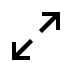

In [114]:
dom.select("a")

우선 모든 a tag를 찾았다.

In [115]:
aList = dom.select("div.rc > h3.r > a")

검색 결과 중 필요한 부분만 남긴다.

In [116]:
for link in aList:
    print(link["href"])

https://www.hancom.com/product/productWindowsMain.do
http://www.hancom.com/downLoad.downPU.do
https://namu.wiki/w/%ED%95%9C%EA%B8%80
https://namu.wiki/w/%ED%95%9C%EC%BB%B4%EC%98%A4%ED%94%BC%EC%8A%A4%20%ED%95%9C%EA%B8%80
https://ko.wikipedia.org/wiki/%ED%95%9C%EA%B8%80
https://ko.wikibooks.org/wiki/%ED%95%9C%EA%B5%AD%EC%96%B4_%EC%9E%85%EB%AC%B8/%ED%95%9C%EA%B8%80_%EC%9E%90%EB%AA%A8
https://www.korean.go.kr/hangeul/principle/001.html
https://www.schneider-electric.co.kr/ko/faqs/FA339474/
https://www.microsoft.com/ko-kr/download/details.aspx?id=36772


In [118]:
def getUrl(url, params=None, num_retries=2):
    html = requests.get(url, params=params, headers=headers)
    
    if 500<=html.status_code<600 and num_retries>0:
        print(html.status_code, html.reason)
        return getUrl(url, params, num_retries-1)
    
    dom = BeautifulSoup(html.text, "lxml")
    links = dom.select("div.rc > h3.r > a")
    
    return [link["href"] for link in links]

google 검색 결과 포맷에 맞춰 링크 정보를 가져오는 함수를 만들었다.

=> google 이외의 페이지에서는 제대로 동작하지 않는다.

In [120]:
linksList = getUrl(url, params)
linksList

['https://www.hancom.com/product/productWindowsMain.do',
 'http://www.hancom.com/downLoad.downPU.do',
 'https://namu.wiki/w/%ED%95%9C%EA%B8%80',
 'https://ko.wikipedia.org/wiki/%ED%95%9C%EA%B8%80',
 'https://ko.wikibooks.org/wiki/%ED%95%9C%EA%B5%AD%EC%96%B4_%EC%9E%85%EB%AC%B8/%ED%95%9C%EA%B8%80_%EC%9E%90%EB%AA%A8',
 'https://www.korean.go.kr/hangeul/principle/001.html',
 'http://www.coree-culture.org/%ED%95%9C%EA%B8%80%EC%9D%B4%EB%9E%80,788.html',
 'https://www1.president.go.kr/petitions/154276']

검색 결과를 최대한 의도한 바에 맞게 만들었다.

In [121]:
def getUrl_global(url, params=None, select="a", num_retries=2):
    html = requests.get(url, params=params, headers=headers)
    
    if 500<=html.status_code<600 and num_retries>0:
        print(html.status_code, html.reason)
        return getUrl_global(url, params, num_retries-1)
    
    dom = BeautifulSoup(html.text, "html.parser")
    links = dom.select(select)
    
    return [link["href"] for link in links if link.has_attr("href") == True]

google 이외의 페이지에서도 동작하도록 수정함.

In [122]:
headers = {
    "user-agent":"Mozilla/5.0 (Macintosh; Intel Mac OS X 10_13_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/67.0.3396.99 Safari/537.36",
    "accept-encoding":"false"
}
params = {
    "q":"한글"
}

In [123]:
seed = "http://www.ppomppu.co.kr/zboard/zboard.php?id=freeboard"
select = "td.list_vspace > a"

contentList = getUrl_global(seed, params, select)
contentList = contentList[1:]
result = list()
contentList

['view.php?id=freeboard&page=1&divpage=1112&no=5958485',
 'view.php?id=freeboard&page=1&divpage=1112&no=5958484',
 'view.php?id=freeboard&page=1&divpage=1112&no=5958483',
 'view.php?id=freeboard&page=1&divpage=1112&no=5958482',
 'view.php?id=freeboard&page=1&divpage=1112&no=5958481',
 'view.php?id=freeboard&page=1&divpage=1112&no=5958480',
 'view.php?id=freeboard&page=1&divpage=1112&no=5958479',
 'view.php?id=freeboard&page=1&divpage=1112&no=5958478',
 'view.php?id=freeboard&page=1&divpage=1112&no=5958477',
 'view.php?id=freeboard&page=1&divpage=1112&no=5958476',
 'view.php?id=freeboard&page=1&divpage=1112&no=5958474',
 'view.php?id=freeboard&page=1&divpage=1112&no=5958473',
 'view.php?id=freeboard&page=1&divpage=1112&no=5958472',
 'view.php?id=freeboard&page=1&divpage=1112&no=5958471',
 'view.php?id=freeboard&page=1&divpage=1112&no=5958470',
 'view.php?id=freeboard&page=1&divpage=1112&no=5958469',
 'view.php?id=freeboard&page=1&divpage=1112&no=5958468',
 'view.php?id=freeboard&page=1&

In [124]:
html = requests.get(seed, params=params, headers=headers)
html.text

'<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">\n<html>\n<head>\n<meta http-equiv="Content-Type" content="text/html; charset=euc-kr" />\n<meta http-equiv="Content-Script-Type" content="text/javascript" />\n<meta http-equiv="Content-Style-Type" content="text/css" />\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta name="author" content="PPOMPPU CO.">\n<meta name="description" content="뽐뿌">\n<meta name="keywords" content="">\n\n\n<!--\n<meta name="viewport" content="width=device-width, initial-scale=1.0, minimum-scale=1.0, user-scalable=yes, target-densitydpi=device-dpi" />\n-->\n\n\n<meta property="og:image" content="http://www.ppomppu.co.kr/images/icon_app_20160427.png" />\n\n<meta property="og:site_name" content="뽐뿌" />\n\n<title>뽐뿌 - 자유게시판</title><!--<link href=\'http://fonts.googleapis.com/css?family=Noto+Sans\' rel=\'stylesheet\' type=\'text/css\'>-->\n\n<link rel="stylesheet" type="text/css" hr

header의 accept-encoding 속성을 false로 바꿔주면 한글 깨짐현상 해결됨.

### 예제 - 뽐뿌 자유게시판 긁어오기

In [127]:
def getContents(url, params=None, select="a", num_retries=2):
    html = requests.get(url, params=params, headers=headers)
    
    if 500<=html.status_code<600 and num_retries>0:
        print(html.status_code, html.reason)
        return getContents(url, params, num_retries-1)
    
    dom = BeautifulSoup(html.text, "html.parser")
    links = dom.select(select)
    
    return links

In [129]:
seed = "http://ppomppu.co.kr/zboard/"

for url in contentList:
    title = getContents(seed+url, params, ".view_title2")
    content = getContents(seed+url, params, "table.pic_bg table table")
    #table.pic_bg 하위의 table 하위의 class가 han인 table을 찾아라.
    comment = getContents(seed+url, params, "table.info_bg div.han")
    if len(title) > 0:
        print("제목:", title[0].get_text())
        print("내용:", title[0].get_text().strip())
        for count in range(len(comment)):
            print("댓글:", comment[count].get_text().strip())
        print("----------------------------------------------------------------------")

제목: 나이먹으니 눈물이 많아지는걸까요
내용: 나이먹으니 눈물이 많아지는걸까요
댓글: 남성호르몬이 줄고 그렇게 되는게 자연스러운걸로 압니다
댓글: 엇 저도그래요
댓글: 남자가 나이를 먹으면 남성 호르몬이 줄어들어서 눈물이 많아진다는 걸 
만화책에서 본 기억이 날듯 말듯 합니다.
댓글: 갱년기라 그래요 눈머리랑 털도 많이 나고 하체에 살도 찐답니다
댓글: 아직 갱년기 걸릴나인 아닌데 고민이 살짝 되네요
----------------------------------------------------------------------
제목: MBC청룡 원년 회원으로써
내용: MBC청룡 원년 회원으로써
댓글: 세월이가면
엘주가 두산패는
세상이 올지도
댓글: 라이벌이라기엔 최근 20년간 거둔 성적의 차이가 어마어마...ㅋㅋㅋ
댓글: 오비 베어스 어린이 회원은 웃습니다.
댓글: 사실 가르시아도 공백이 길어서, 김현수 하나 변화있는 타선은 이렇게 뜨거워지고 
오히려 선수 보충된 1위 투수진은 한시즌만에 이렇게 무너지네요. 
저희는 온집안이 엘지팬인데 참... 속상합니다.
기업 총수가 이렇게 애정으로  공들인 구단이 없을 뿐더러, 자금이 없나, 팬이 없나, 위치가 안좋나 참 아이러니해요....
2군 육성 인프라 투자는 역대급으로 해놓고, 화수분 야구하는 두산이 부럽네요.
댓글: 햐태 타이거즈 어린이팬은
우흡니다
댓글: 사실 라이벌 깜이 안되죠...
걍 서울 연고라는 공통점 빼고는
댓글: 19시즌 두산위 14시즌 엘지위 
역대로는 50경기 정도 두산이 앞설껍니다
댓글: 선택 잘하셨습니다. ㅎㅎㅎ 
인생은 라인이죠!
댓글: 이때 맨날우승
질릴정도로
우승하더군여
댓글: 마지막 오비베어스 김동주
최초의 두산베어스 홍성흔
이 두사람 입단후 베어스엔 훈풍이 엘지엔 역풍이 불었습니다
댓글: 기아도 우승맛 많이 보셔서 부럽습니다...ㅠㅠ 
어릴땐 아무것도 몰라서 그 맛을 아직 몰라요...
댓글: 당시엔 서울 연고가 mbc 뿐이라 
청룡 회원이 당연하다 생각햇죠 ㅠ
댓글: 아재 파티인듯...ㅋ

제목:  혜경궁김씨(35일차).jpg
내용: 혜경궁김씨(35일차).jpg
댓글: 35일 되도록 경찰은 뭐하고있나?????????????
댓글: '그알'이 궁금해요! 혜경궁김씨는 각오 하즈아!
댓글: 추천~~~
댓글: 이정렬 변호사가 고발장 접수한지가 언제인데, 아직도 밍기적대고 있는지 원...
댓글: 추천합니다
댓글: 추천합니다!
댓글: 추천
댓글: 추천합니다
댓글: 또 추천ᆢ계속추천^^~
댓글: 매번매번 해주세요 추천드릴께요
----------------------------------------------------------------------
제목: 아.. 핵붉닭 볶음면 사다 놓은걸 부모님이 드셨나 봅니다. -_-;;
내용: 아.. 핵붉닭 볶음면 사다 놓은걸 부모님이 드셨나 봅니다. -_-;;
댓글: 귀가하실때 초코우유 하나 사가시는게 ㅋㅋ;
다음날 아침 화장실에서 아버지의 절규가 울려퍼질지도 모릅니다
댓글: 말은 못하시고 지나가면서 아들을 노려보시면 백프롭니다.
댓글: 핵불닭.... 먹고 똥싸다가 진심 엄청 힘들었는데...
댓글: 따로 사는데 저 나갔다 온사이에 들러서 드시고 가셨나 봅니다 ^^
----------------------------------------------------------------------
제목: 혼술안주로 동태동태탕
내용: 혼술안주로 동태동태탕
----------------------------------------------------------------------
제목: 9.7 아이패드 샀습니다ㅎㅎ
내용: 9.7 아이패드 샀습니다ㅎㅎ
댓글: 저도 12.9 1세대 쓰는데 9.7 괜춘할까요 느릴거같은데 ㄷㄷ 9.7액정은 쓰레기급이라던데 프로아니면
댓글: 근데 애들 좀 아이러니한게
소속이 롯데인데 롯데카드는 왜 자꾸 빼먹고 
행사하는지 ㅋㅋㅋㅋ
댓글: 이게 펜지원 하는 그건가요?
댓글: 계속 돌아가면서 해요 며칠전에 롯데카드였어요
청구할인 카드사는 계속 바껴요
댓글: 롯데니 항상 고정으로 있어야 하지 않나 싶어서요 ㅎ

자유게시판에 존재하는 제목들에서 링크 주소를 얻어온 다음, 각 링크에 들어가 제목과 내용, 댓글을 가져온다.

___

## Crawling-using Selenium

In [130]:
import requests
from bs4 import BeautifulSoup

In [133]:
resp = requests.get("http://example.webscraping.com/places/default/search")

dom = BeautifulSoup(resp.content, "lxml")
result = dom.select("#results")
print(len(result))
print(result)

1
[<div id="results">
</div>]


비동기식으로 데이터를 받아왔으므로 실제로 데이터가 바뀜에도 바뀐 데이터를 가져올 수 없다.(코드를 통해 브라우저에서 일어난 일에 대한 크롤링을 해올 수 없다.)

해결: Selenium을 사용하면 코드를 통해 브라우저에서 일어나는 일도 크롤링해올수 있다.

In [134]:
from selenium import webdriver

driver = webdriver.Chrome()

In [139]:
driver.get("http://example.webscraping.com/places/default/search")
driver.find_element_by_id("search_term").send_keys("korea")
driver.find_element_by_id("search").click()
driver.implicitly_wait(1)
links = driver.find_elements_by_css_selector("#results a")
[link.text for link in links]

['North Korea', 'South Korea']

In [137]:
driver.page_source

'<!--[if HTML5]><![endif]--><!DOCTYPE html><!-- paulirish.com/2008/conditional-stylesheets-vs-css-hacks-answer-neither/ --><!--[if lt IE 7]><html class="ie ie6 ie-lte9 ie-lte8 ie-lte7 no-js" lang="en-us"> <![endif]--><!--[if IE 7]><html class="ie ie7 ie-lte9 ie-lte8 ie-lte7 no-js" lang="en-us"> <![endif]--><!--[if IE 8]><html class="ie ie8 ie-lte9 ie-lte8 no-js" lang="en-us"> <![endif]--><!--[if IE 9]><html class="ie9 ie-lte9 no-js" lang="en-us"> <![endif]--><!--[if (gt IE 9)|!(IE)]><!--><html xmlns="http://www.w3.org/1999/xhtml" class=" js flexbox flexboxlegacy canvas canvastext webgl no-touch geolocation postmessage websqldatabase indexeddb hashchange history draganddrop websockets rgba hsla multiplebgs backgroundsize borderimage borderradius boxshadow textshadow opacity cssanimations csscolumns cssgradients cssreflections csstransforms csstransforms3d csstransitions fontface generatedcontent video audio localstorage sessionstorage webworkers applicationcache svg inlinesvg smil svgcl

Selenium을 활용하여 코드를 통해 브라우저 내에서 변화된 데이터도 크롤링해왔다.

___

### 예제: 네이버 메일에서 메일 제목만 출력하기

In [140]:
import json

with open('account.json', 'r') as f:
    account = json.load(f)

In [141]:
from selenium.common.exceptions import NoSuchElementException

In [142]:
driver.get("https://nid.naver.com/nidlogin.login")

driver.find_element_by_id("id").send_keys(account["id"])
driver.find_element_by_id("pw").send_keys(account["pw"])

driver.find_element_by_css_selector(".btn_global").click()

네이버 로그인 페이지로 가서 id와 비밀번호를 입력하고 로그인 버튼을 눌러 자동으로 로그인한다.

In [143]:
try:
    driver.find_element_by_css_selector(".btn_upload > a").click()
    driver.find_element_by_css_selector(".btn_maintain > a").click()
except NoSuchElementException as e:
    print(e)
finally:
    driver.get("https://mail.naver.com?n=1531981375730&v=f")

Message: no such element: Unable to locate element: {"method":"css selector","selector":".btn_upload > a"}
  (Session info: chrome=67.0.3396.99)
  (Driver info: chromedriver=2.40.565386 (45a059dc425e08165f9a10324bd1380cc13ca363),platform=Mac OS X 10.13.4 x86_64)



네이버 메일 페이지로 이동.

In [144]:
html = BeautifulSoup(driver.page_source, "lxml")
tempList = html.select(".subject strong")

for temp in tempList:
    print(temp.contents[1])

아주 특별한 여름, 아묻따 신청해야할 취업대학교 무료배포 가이드북 리스트!
토모나리(TOMONARI) 이*현님의 주문내역서 확인 메일입니다.
[네이버페이]구매하신 제품의 취소가 요청되었습니다
[네이버페이]구매하신 제품의 취소가 완료되었습니다
[네이버페이]결제하신 내역을 안내해드립니다
#주말 #꿀공고 #놓치지마세요! #채용 #취준
(광고)2018 하반기 삼성전자/SK하이닉스 지원자를 위한 [반도체 8대공정 2일 완성] OPEN
Use cases for the fastest-growing database
#크라운제과 #텐바이텐 #오늘의 # 마지막 #채용속보 
7월 4주에 올라온 인턴/대외활동/공모전/직무별 공고를 한눈에!
#제일건설 #꿀공고 #채용 #하반기 #취업
항공사 경력 21년 현직 외항사 승무원입니다. / 아시아나항공 합격자소서 모음집 배포!
평균연봉 6,141만원! ★SC제일은행★ 00명 일반행원 채용 외 오늘 뜬 공고 & 뉴스
★렛유인★ LG이노텍 기업분석 가이드북 입니다^^
중소기업 취업, 만족할 수 있을까? 전문가들의 현실적 조언


네이버 메일 페이지를 lxml로 파싱한 후 메일 제목만 가져오기 위해 .subject strong으로 리스트를 만든 다음 제목만 빼온다.

___

### 예제: 네이버 뉴스에서 댓글 자동으로 입력

In [145]:
driver.get("https://nid.naver.com/nidlogin.login")

driver.find_element_by_id("id").send_keys(account["id"])
driver.find_element_by_id("pw").send_keys(account["pw"])

driver.find_element_by_css_selector(".btn_global").click()

try:
    driver.find_element_by_css_selector(".btn_upload > a").click()
    driver.find_element_by_css_selector(".btn_maintain > a").click()
except NoSuchElementException as e:
    print(e)
finally:
    driver.get("https://sports.news.naver.com/kbaseball/news/read.nhn?oid=109&aid=0003826361")

Message: no such element: Unable to locate element: {"method":"css selector","selector":".btn_upload > a"}
  (Session info: chrome=67.0.3396.99)
  (Driver info: chromedriver=2.40.565386 (45a059dc425e08165f9a10324bd1380cc13ca363),platform=Mac OS X 10.13.4 x86_64)



네이버 로그인 후 네이버 스포츠 기사 주소로 이동

In [146]:
driver.implicitly_wait(3)

driver.find_element_by_css_selector(".u_cbox_text").send_keys("ㄹㄴㅁ아ㅓㅏㅣㄹㄴㅁ어ㅐㅑ겯재뱌ㅓㅏㅣㅇㄴㅁ라ㅣㅜㄹㄴㅇ마ㅣㅓㅏㅣ")

temp = driver.find_element_by_css_selector(".u_cbox_text")

기사 페이지 내 댓글창에 내용 입력.